# Title: Predicting the percentage of a student based on the number of study hours

## Importing libraries

In [11]:
# Importing pandas for data exploration

import pandas as pd

# Importing numpy for data calculations

import numpy as np

# Importing matplotlib for data visualization

import matplotlib.pyplot as plt

In [113]:
# Importing the dataset

data=pd.read_csv('http://bit.ly/w-data')

## Data Exploration 

In [18]:
# First 5 rows in dataset

data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [17]:
# Last 5 rows in dataset

data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [22]:
# Total no. of rows and columns present in dataset

print(data.shape)

(25, 2)


In [37]:
# Let's see if there are any null values existing in dataset

data.isna().sum()

Hours     0
Scores    0
dtype: int64

In [23]:
# Let's check few statistical details of the dataset

data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [24]:
# Concise summary to get quick overview

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Data Visualization

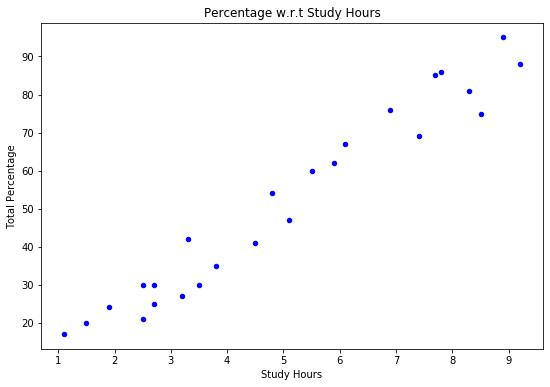

In [49]:
# Let's use scatterplot and check if there is any relationship between the data 

data.plot(kind='scatter', x='Hours', y='Scores', color='blue', figsize=(9,6))
plt.title("Percentage w.r.t Study Hours")
plt.xlabel("Study Hours")
plt.ylabel("Total Percentage")
plt.show()

#### From above visualization, we can clearly understand that there is a linear relation between both the columns

## Data Modelling

In [38]:
# Since there aren't any missing values, lets proceed with categorizing the data into inputs (x) and outputs (y)

x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [111]:
# Let's split the data into Training and Testing sets
# For implementing the above statement, we'll use train_test_split() method from sklearn library

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

## Training the Model

In [55]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

print("Training successful")
print('Coefficients: ', regressor.coef_)
print('Intercept: ', regressor.intercept_)

Training successful
Coefficients:  [9.91065648]
Intercept:  2.018160041434683


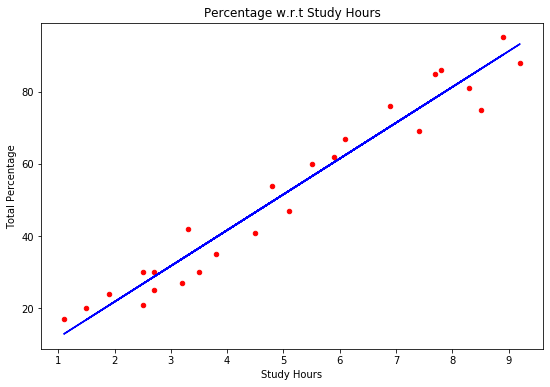

In [114]:
# Let us plot the regression line

data.plot(kind='scatter', x='Hours', y='Scores', figsize=(9,6), color='red')
line = regressor.coef_ * x + regressor.intercept_
plt.plot(x, line, color='blue')
plt.title("Percentage w.r.t Study Hours")
plt.xlabel("Study Hours")
plt.ylabel("Total Percentage")
plt.show()

## Model Evaluation

In [115]:
# Let us calculate Mean absolute error and r-squared values to chech accuracy using 'metrics' from sklearn library

from sklearn import metrics
from sklearn.metrics import r2_score

y_pred = regressor.predict(x_test)
print('Mean Absolute Error: {}'.format(metrics.mean_absolute_error(y_pred, y_test)))
print('r2 score: %.2f' % r2_score(y_pred, y_test))

Mean Absolute Error: 4.764204324744266
r2 score: 0.98


In [116]:
# Testing data in hours

print (x_test)

# Predicting the scores

y_pred = regressor.predict(x_test)

[[1.1]
 [2.5]
 [1.9]
 [9.2]
 [6.9]]


In [117]:
# Compare actual vs predicted

data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

,Actual,Predicted
0,17,12.919882
1,21,26.794801
2,24,20.848407
3,88,93.196200
4,76,70.401690


## Percentage Prediction

In [134]:
Hours = 9.25
predicted_score = regressor.predict([[Hours]])
print("No. of hours studied = {}".format(Hours))
print("Predicted percentage = {:,.2f}".format(predicted_score[0]))

No. of hours studied = 9.25
Predicted percentage = 93.69


#### Hereby, we can conclude that if the student studies for 9.25 hours, he can score a percentage of 93.69